# Pkg install(初回のみ）
- Plots：描画
  - https://horohoronblog.com/?p=469
- GR：描画パッケージ
  - http://www.cas.cmc.osaka-u.ac.jp/~paoon/misc/julia/post/trouble-plots-package/
- Plotly：描画バッケージ
  - https://dora.bk.tsukuba.ac.jp/~takeuchi/?%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%2Fjulia%2F%E3%82%B0%E3%83%A9%E3%83%95%E3%81%AE%E6%9B%B8%E3%81%8D%E6%96%B9
- PyCall：pythonのパッケージを呼び出すことができる（仮想環境にインストール必要あり）
- Distances：Distacce calculate
  - https://github.com/JuliaStats/Distances.jl
- ForwardDiff：Audo differensism
  - http://www.cas.cmc.osaka-u.ac.jp/~paoon/misc/julia/post/forwarddiff/

In [ ]:
# using Pkg
# Pkg.add("Plots")
# Pkg.add("GR")

In [ ]:
# using Pkg
# Pkg.add("PyCall")

In [20]:
# using Pkg
# Pkg.add("Distances")

  Resolving package versions...
  Installed Distances ─ v0.9.0
Updating `~/.julia/environments/v1.5/Project.toml`
  [b4f34e82] + Distances v0.9.0
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [b4f34e82] + Distances v0.9.0


In [109]:
using Pkg
Pkg.add("ForwardDiff")

  Resolving package versions...
  Installed CompilerSupportLibraries_jll ─ v0.3.3+0
  Installed OpenSpecFun_jll ────────────── v0.5.3+3
  Installed DiffResults ────────────────── v1.0.2
  Installed DiffRules ──────────────────── v1.0.1
  Installed CommonSubexpressions ───────── v0.3.0
  Installed SpecialFunctions ───────────── v0.10.3
  Installed ForwardDiff ────────────────── v0.10.12
######################################################################### 100.0%
######################################################################### 100.0%                            37.2%
Updating `~/.julia/environments/v1.5/Project.toml`
  [f6369f11] + ForwardDiff v0.10.12
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [e66e0078] + CompilerSupportLibraries_jll v0.3.3+0
  [163ba53b] + DiffResults v1.0.2
  [b552c78f] + DiffRules v1.0.1
  [f6369f11] + ForwardDiff v0.10.12
  [efe28fd5] + OpenSpecFun_jll v0.5.3+3
  [276daf66] + SpecialFunctions v0.10.3

Plotsのインストールは時間がかかるので失敗する可能性がある。その時は再インストール。

In [ ]:
# using Pkg
# Pkg.rm("Plots")
# Pkg.gc()
# Pkg.add("Plots")
# Pkg.add("GR")

# 実装
## 使うパッケージの宣言
using Plots重い. 

Plots.gr()で描画にGRを使う宣言


In [21]:
using Random
using Plots
using Distances
Plots.gr()

┌ Info: Precompiling Distances [b4f34e82-e78d-54a5-968a-f98e89d6e8f7]
└ @ Base loading.jl:1278


Plots.GRBackend()

In [125]:
using ForwardDiff

## 実験パラメータの設定

In [242]:
N = 100
D = 3
L = 2
epoch = 200
eta = 0.1

0.1

## データの生成

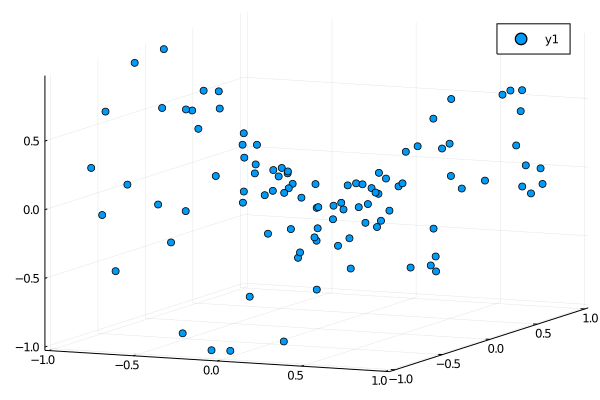

In [163]:
true_z = rand(Float64, (N, L)) .* 2.0 .- 1.0
x1 = true_z[:,1]
x2 = true_z[:,2]
x3 = x1 .^2 - x2 .^2
# x = hcat(x1[:,:],x2[:,:],x3[:,:])
# x = [x1[:,:],x2[:,:],x3[:,:]]
x = hcat(x1,x2,x3)
size(x)
scatter(x1, x2, x3, marker=:circle)

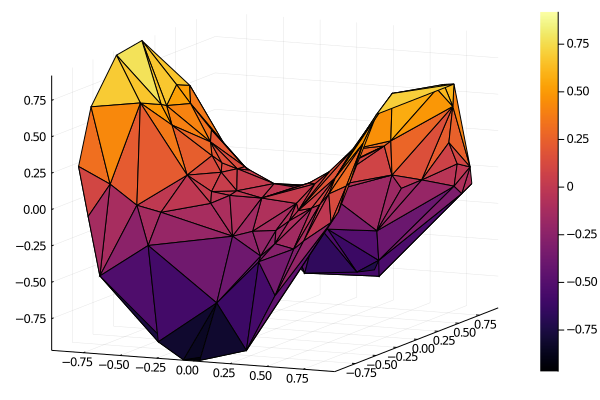

In [164]:
plot(x1,x2,x3,st=:surface)

こっちはうまく動かんけど試したやつ

In [ ]:
# f(x,y) = (x .^2 - y .^ 2)
# z = [f(i,j) for i in x1, j in x2]
# print(size(z))
# # plot(x1,x2,z,st=:wireframe)
# plot(x1,x2,x3,st=:wireframe)

In [10]:
# https://qiita.com/tenfu2tea/items/088b750f0204debe4f7f
# using PyCall
# @pyimport mayavi.mlab as mlab

# mlab.init_notebook("x3d")]
# mlab.test_points3d()

## 潜在変数の設定
ガウス分布

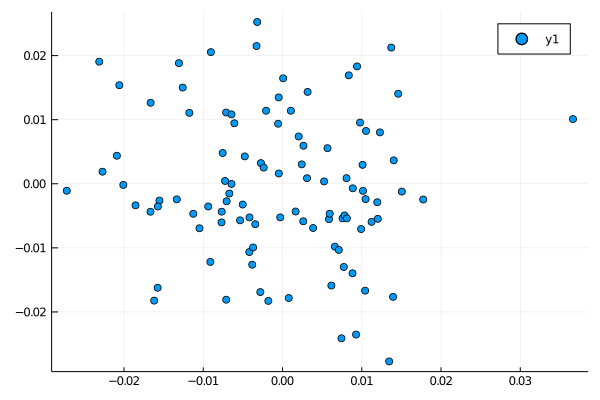

In [243]:
z = randn(Float64, (N, L)) * 0.01
scatter(z[:,1], z[:,2])

In [225]:
# for i in 1:epoch
#     estimated_x = f(z,x)
# #     print(size(estimated_x), size(x))
#     E = sum(evaluate(SqEuclidean(),estimated_x,x)) 
#     j = jacobian(E) 
#     z_grad(z)
# end

# 微分機能知る前

In [244]:
function f(z,x)
    R = exp.(-0.5 .* pairwise(SqEuclidean(),z,z,dims=1))
#     sum((z[1,:]-z[2,:]).^ 2)
    G = sum(R, dims=1)
#     print("G.shape:",size(G))
    R_tilde = broadcast(/,R,G)
#     print(sum(R_tilde,dims=2)) # 正規化とった方向に合計をとると1になるよね。
    Y = R*x
    return Y
end

f (generic function with 2 methods)

In [245]:
function E(z,x)
    estimated_x = f(z,x)
    E = sum(evaluate(SqEuclidean(),estimated_x,x)) 
    return E
end

E (generic function with 1 method)

In [246]:
for i in 1:epoch
#     print(size(estimated_x), size(x))
    f(z) = E(z,x)
    z -= ForwardDiff.gradient(f,z) .* eta
#     print(z)
end


[0.4512747312735485 -0.7365446091604169; -0.22714552140707242 0.14550116773823069; 0.0026389088079880915 -0.09304578664680428; -0.21025050966108016 0.11024802880183715; 0.20972664103831867 -0.06228839287510161; -0.023171536543996292 0.024499034666562364; -0.23586775234971508 0.25781349480472215; -0.17402323508836778 0.8866246393334364; 0.6403262956181626 -0.4462674459588775; 0.187992858433863 -0.3024550160544806; -1.3301593915599632 1.0752099675549365; 0.0802944085476784 0.09569618113415215; -0.4844480930877592 0.7114847711400369; -1.1639353345516634 -0.1746378939979625; -0.16684097789645208 -0.7293577910878867; -0.5761411156254548 0.5525165185149408; -0.46984074449042185 -0.13552314226475368; 0.46560217406270504 0.10009381739939745; 0.21654957112942835 0.16883874313930594; -0.3486452855438426 -0.08606043207184695; 0.49899396756679626 -0.04012005776813225; 0.2668105518208809 0.35143853282752674; -0.3421647923387729 0.6444449764840177; 0.7433198748965741 -0.9828154599595738; 0.027812243

Excessive output truncated after 524303 bytes.

[2.805417243230494 -0.40627668657888866; -5.475848723219362 2.900468938152188; -0.6830801980497545 0.36119837490037127; -1.6907284880218814 -0.1454963764059108; 5.3216206704036315 -0.29269759363025094; -3.3590849436578205 -2.0331845779509594; 5.185325680716223 -6.467111958297307; -1.3018280229395705 1.300516121542675; 4.51484060110324 -4.313285058853711; 5.460490199792218 -8.782411282742274; 8.181459392969083 -6.26997948460823; 1.1456260161837584 1.338540916017945; -0.9963165345788587 -0.6144497924413265; 14.33647043454916 0.6725552413639582; 2.7626158633364435 13.175232456261403; 2.2662359401499192 -1.6047262125571655; 3.247277781209317 1.458822819845866; 1.2574652066216285 2.2980189634179036; -3.1453452280984306 -4.040372716798783; -7.126739436859638 -0.2650633279577549; 8.854708358247615

In [247]:
y = f(z,x)

100×3 Array{Float64,2}:
  0.93874     0.884558    0.0736693
 -0.48474    -0.615543   -0.301804
  0.0237857   0.0378206   0.0583818
 -0.291789   -0.130202    0.00489893
  0.249057    0.850012   -0.429806
 -0.436743   -0.539998   -0.0128172
  1.0222     -0.596133    0.485633
  0.340863   -0.303633    0.12689
  0.992697   -0.893626    0.0884352
  0.227645    0.847916   -0.71673
  0.962779    0.460749    0.6865
  0.189024    0.29533    -0.061932
  0.673703   -0.526695    0.254945
  ⋮                      
  1.07346    -0.830651    0.30653
  0.082405    0.870606   -0.773226
 -0.806324    0.225761    0.597996
  0.779841    0.776834   -0.0436804
 -0.789341   -0.192396    0.546437
 -0.331231   -0.061952   -0.0274889
 -0.319084    0.222417   -0.061697
  0.700684   -0.614225    0.0675807
  0.514754   -0.72934    -0.196813
  0.172365   -0.537382   -0.0674969
 -0.612419    0.769027   -0.237618
  0.479895   -0.861752   -0.512311

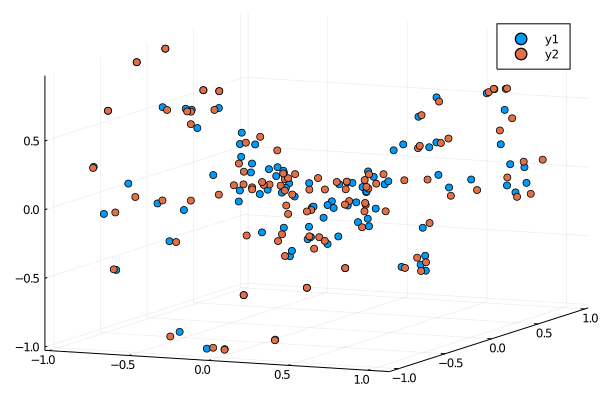

In [248]:
# plot(x1,x2,x3,st=:surface)
scatter(x[:,1],x[:,2],x[:,3], marker=:circle)
scatter!(y[:,1],y[:,2],y[:,3], marker=:circle)


In [210]:
z

100×2 Array{Float64,2}:
  256.022   -297.78
 -120.257    149.184
   60.2653   -67.9518
 -165.562    171.323
   13.8825   -32.5909
 -150.878    180.33
  585.411   -565.031
  220.712   -212.589
  595.47    -566.983
  -48.3792    40.5764
  394.851   -448.545
   28.374    -45.0055
  439.127   -420.648
    ⋮       
  613.909   -584.939
  -99.0845    91.6193
 -556.619    555.113
  213.774   -247.75
 -438.355    479.496
 -212.236    213.717
 -233.755    220.622
  407.719   -391.306
  396.221   -377.888
  208.248   -194.48
 -513.885    486.08
  345.691   -331.779

In [212]:
exp.(z)

100×2 Array{Float64,2}:
 1.54455e111   4.74148e-130
 5.9304e-53    6.16538e64
 1.48901e26    3.08246e-30
 1.25078e-72   2.53915e74
 1.06933e6     7.01354e-15
 2.98197e-66   2.0726e78
 1.74052e254   4.07344e-246
 7.14611e95    4.72034e-93
 4.06928e258   5.78559e-247
 9.75401e-22   4.18916e17
 3.0326e171    1.58309e-195
 2.10227e12    2.84683e-20
 5.13152e190   2.06524e-183
 ⋮             
 4.14422e266   9.21245e-255
 9.29312e-44   6.16274e39
 1.83382e-242  1.20981e241
 6.93186e92    2.53329e-108
 4.21533e-191  1.74792e208
 6.71872e-93   6.54595e92
 3.02927e-102  6.52932e95
 1.17479e177   1.1423e-170
 1.19302e172   7.68158e-165
 2.75949e90    3.45553e-85
 6.64488e-224  1.26374e211
 1.35482e150   8.13543e-145